# Regression Model Comparison

## Objective:  Predict life expectancy at birth using regression models.  Compare optimized model performance for the following algorithms:

- Random Forest Regressor
- Gradient Boosted

## Procedure:

1.  Load data into dataframe.
2.  Use Pipeline() and GridSearchCV() to optimize model parameters.  
    - Apply StandardScaler(), OneHotEncode(), and Principal Component Analysis (PCA) where appropriate.<br>
    - Record performance scores and model parameters. 
3.  Compare model scores to determine best performing model.

# Import Packages

In [3]:
# pandas, numpy, matplotlib, seaborn, plotly libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns


%matplotlib inline

In [4]:
# sklearn libraries

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA, NMF
from sklearn.feature_selection import SelectKBest, chi2

In [5]:
!ls


Capstone 2  Exploratory Data Analysis - Ed Gatdula.ipynb
Capstone 2 Data Modeling - Ed Gatdula.ipynb
Capstone 2 Data Modeling_RandomForestRegressor_GradientBoosting Pipeline.ipynb
Capstone 2 Project Ed Gatdula.ipynb
Untitled.ipynb
capstone_2_project_data_files
df_emp_edu_pov
df_final
df_mortality
life_county_hist.png
life_hist.png
presentation images


# Import Dataframe

## Select feature columns

### - Eleven features are selected from df_final, the dataframe containing all compiled data. 

1. 'State'
2. 'County Name'
3. 'e(0)'.  Life expectancy at birth.  This is the target.
4. 'Percent of adults with less than a high school diploma, 2015-19',
5. 'Percent of adults with a high school diploma only, 2015-19',
6. "Percent of adults completing some college or associate's degree, 2015-19",
7. "Percent of adults with a bachelor's degree or higher, 2015-19", 'PCTPOV017_2019',
8. 'Unemployment_rate_2020', 
9. 'Median_Household_Income_2019',
10. 'Med_HH_Income_Percent_of_State_Total_2019'
11. 'PCTPOV017_2019'



In [6]:
df = pd.read_csv('./df_final')

In [7]:
df.columns.values

array(['Unnamed: 0', 'Tract ID', 'STATE2KX_x', 'CNTY2KX', 'TRACT2KX',
       'e(0)', 'se(e(0))', 'Abridged life table flag', 'State',
       'County Name', 'STATE2KX_y', 'STUSAB', 'STATENS', 'FIPS_Code',
       'Area_name_x', 'Rural_urban_continuum_code_2013',
       'Urban_influence_code_2013', 'Metro_2013',
       'Civilian_labor_force_2000', 'Employed_2000', 'Unemployed_2000',
       'Unemployment_rate_2000', 'Civilian_labor_force_2001',
       'Employed_2001', 'Unemployed_2001', 'Unemployment_rate_2001',
       'Civilian_labor_force_2002', 'Employed_2002', 'Unemployed_2002',
       'Unemployment_rate_2002', 'Civilian_labor_force_2003',
       'Employed_2003', 'Unemployed_2003', 'Unemployment_rate_2003',
       'Civilian_labor_force_2004', 'Employed_2004', 'Unemployed_2004',
       'Unemployment_rate_2004', 'Civilian_labor_force_2005',
       'Employed_2005', 'Unemployed_2005', 'Unemployment_rate_2005',
       'Civilian_labor_force_2006', 'Employed_2006', 'Unemployed_2006',
       '

In [8]:
# Select features for use in regression modeling

df_ = df[['e(0)', 'Percent of adults with less than a high school diploma, 2015-19',
         'Percent of adults with a high school diploma only, 2015-19',
         "Percent of adults completing some college or associate's degree, 2015-19",
         "Percent of adults with a bachelor's degree or higher, 2015-19", 'PCTPOV017_2019',
         'Unemployment_rate_2020', 'Median_Household_Income_2019',
         'Med_HH_Income_Percent_of_State_Total_2019']]

print(df_.shape)
df_.sample(5)

(65662, 9)


,e(0),"Percent of adults with less than a high school diploma, 2015-19","Percent of adults with a high school diploma only, 2015-19","Percent of adults completing some college or associate's degree, 2015-19","Percent of adults with a bachelor's degree or higher, 2015-19",PCTPOV017_2019,Unemployment_rate_2020,Median_Household_Income_2019,Med_HH_Income_Percent_of_State_Total_2019
34851,78.0,15.318180,38.739056,29.972912,15.969851,22.7,6.1,45746.0,79.731590
29305,87.0,7.062722,27.824017,27.500452,37.612808,9.3,9.5,90584.0,105.698952
6899,82.2,14.528754,17.222048,27.662764,40.586433,12.6,8.8,95761.0,119.071655
38487,83.0,5.488366,20.069059,20.379946,54.062630,5.4,7.8,116328.0,135.602539
6331,81.3,20.866573,20.610870,25.981346,32.541210,18.3,12.8,72721.0,90.423134


In [9]:
# inspect for missing NaN values

df_.isna().sum()

e(0)                                                                         0
Percent of adults with less than a high school diploma, 2015-19             10
Percent of adults with a high school diploma only, 2015-19                  10
Percent of adults completing some college or associate's degree, 2015-19    10
Percent of adults with a bachelor's degree or higher, 2015-19               10
PCTPOV017_2019                                                              10
Unemployment_rate_2020                                                      10
Median_Household_Income_2019                                                10
Med_HH_Income_Percent_of_State_Total_2019                                   10
dtype: int64

In [10]:
# locate df_ rows with NaN values
# drop rows with NaN values

df_[df_.isna().any(axis=1)]

df_ = df_.dropna(axis = 0)

print(df_.shape)
df_.isna().sum()

(65652, 9)


e(0)                                                                        0
Percent of adults with less than a high school diploma, 2015-19             0
Percent of adults with a high school diploma only, 2015-19                  0
Percent of adults completing some college or associate's degree, 2015-19    0
Percent of adults with a bachelor's degree or higher, 2015-19               0
PCTPOV017_2019                                                              0
Unemployment_rate_2020                                                      0
Median_Household_Income_2019                                                0
Med_HH_Income_Percent_of_State_Total_2019                                   0
dtype: int64

In [11]:
df_.columns

Index(['e(0)',
       'Percent of adults with less than a high school diploma, 2015-19',
       'Percent of adults with a high school diploma only, 2015-19',
       'Percent of adults completing some college or associate's degree, 2015-19',
       'Percent of adults with a bachelor's degree or higher, 2015-19',
       'PCTPOV017_2019', 'Unemployment_rate_2020',
       'Median_Household_Income_2019',
       'Med_HH_Income_Percent_of_State_Total_2019'],
      dtype='object')

# RandomForestRegressor

## Results


In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [13]:
# Create Regression Model Results Dataframe

df_summary = pd.DataFrame(columns = ['name', 'parameters', 'train set score', 'test set score', 'RMSE'])

In [14]:
# test, train split data

features = df_.drop('e(0)', axis = 1)
target = df_['e(0)']

X_train, X_test, y_train, y_test = train_test_split(features, target, train_size=0.70)

print("X_train shape: {}, y_train shape:{}".format(X_train.shape, y_train.shape))
print("X_test shape: {}, y_test shape:{}".format(X_test.shape, y_test.shape))


X_train shape: (45956, 8), y_train shape:(45956,)
X_test shape: (19696, 8), y_test shape:(19696,)


In [15]:
# instantiate randomforestregressor

forest = RandomForestRegressor()
forest.fit(X_train, y_train)

# predict using X_test.  evaluate regression model performance

name_ = "Random Forest"
y_pred = forest.predict(X_test)
params_ = forest.get_params
RMSE_score = mean_squared_error(y_test, y_pred, squared=False)
train_score = forest.score(X_train,y_train)
test_score = forest.score(X_test, y_test)

print("RandomForest training set score:{:.2f}".format(forest.score(X_train,y_train)))
print("RandomForest best parameters:{}".format(params_))
print("RandomForest test set score:{:.2f}".format(forest.score(X_test, y_test)))
print("RMSE Score:{}".format(mean_squared_error(y_test, y_pred, squared=False)))

# append RandomForestRegressor() information to df_summary
df_summary = df_summary.append({'name': name_ , 'parameters':params_, 'train set score': test_score,
                                'test set score': train_score,
                                'RMSE': RMSE_score}, ignore_index=True)

RandomForest training set score:0.32
RandomForest best parameters:<bound method BaseEstimator.get_params of RandomForestRegressor()>
RandomForest test set score:0.25
RMSE Score:3.449325080021797


In [16]:
df_summary

,name,parameters,train set score,test set score,RMSE
0,Random Forest,<bound method BaseEstimator.get_params of Rand...,0.248842,0.32351,3.449325


In [17]:
# get features importances, use plotly to visualize


#importances = forest.feature_importances_
#df_features = pd.DataFrame(importances, columns = features.columns)

importances = forest.feature_importances_
test = dict(zip((features.columns),forest.feature_importances_))
print(test)

df_importances = pd.DataFrame.from_dict(test, orient='index')

{'Percent of adults with less than a high school diploma, 2015-19': 0.07888700684350598, 'Percent of adults with a high school diploma only, 2015-19': 0.056107880035043994, "Percent of adults completing some college or associate's degree, 2015-19": 0.05300655239741757, "Percent of adults with a bachelor's degree or higher, 2015-19": 0.04128251904038427, 'PCTPOV017_2019': 0.09469095465573212, 'Unemployment_rate_2020': 0.059189792246928434, 'Median_Household_Income_2019': 0.5368344084035348, 'Med_HH_Income_Percent_of_State_Total_2019': 0.0800008863774529}


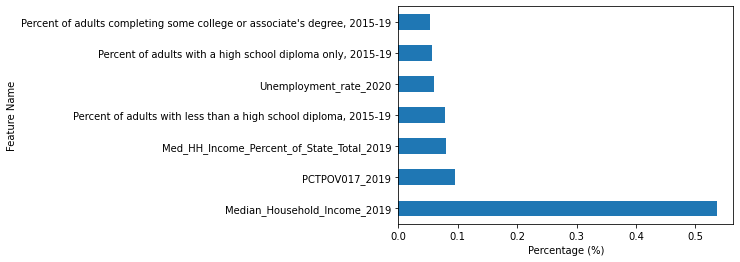

In [60]:
# plot the 7 most important features 
fig, ax = plt.subplots()


feat_importances = pd.Series(forest.feature_importances_, index = X_train.columns)
ax = feat_importances.nlargest(7).plot(kind='barh')

ax.set_xlabel("Percentage (%)")
ax.set_ylabel("Feature Name")

# Add the legend and show the Figure
#ax.legend()
plt.savefig('features_forest.png', bbox_inches="tight")
plt.show();

## GridSearchCV RandomForestRegressor - Parameter Tuning

In [19]:
# define steps

steps = [('forest', RandomForestRegressor())]

# instantiate pipeline object

pipe = Pipeline(steps)

# define gridsearch parameters dict

param_grid = {'forest__n_estimators':[1,2,5,10,25,50,100],
             'forest__max_features':[1,2,3,4,5,6]}

# split data into test train split

# test, train split data

features = df_.drop('e(0)', axis = 1)
target = df_['e(0)']

X_train, X_test, y_train, y_test = train_test_split(features, target, train_size=0.70)


# instantiate GridSearchCV object using pipeline, parameters dict

grid_search = GridSearchCV(pipe, param_grid, cv=5, return_train_score = True)

# fit cv

grid_search.fit(X_train, y_train)



# evaluate results

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('forest', RandomForestRegressor())]),
             param_grid={'forest__max_features': [1, 2, 3, 4, 5, 6],
                         'forest__n_estimators': [1, 2, 5, 10, 25, 50, 100]},
             return_train_score=True)

In [20]:
# Model performance metrics

y_pred = grid_search.predict(X_test)

model_name = "RandomForestRegressor - GridSearch"
RMSE_score = mean_squared_error(y_test, y_pred, squared=False)
params_ = grid_search.best_params_
train_score = grid_search.score(X_train,y_train)
test_score = grid_search.score(X_test, y_test)

print("Train set score: {:2f}".format(train_score))
print("Test set score: {:.2f}".format(test_score))
print("Best parameters: {}".format(params_))
print("RMSE score: {}".format(RMSE_score))
print("Best cross_validation score: {:.2f}".format(grid_search.best_score_))

#Append model metrics to df_summary

# append RandomForestRegressor() information to df_summary
df_summary = df_summary.append({'name': name_ , 'parameters':params_, 'train set score': test_score,
                                'test set score': train_score,
                                'RMSE': RMSE_score}, ignore_index=True)

Train set score: 0.322864
Test set score: 0.25
Best parameters: {'forest__max_features': 6, 'forest__n_estimators': 100}
RMSE score: 3.4340822236376454
Best cross_validation score: 0.24


In [21]:
df_summary

,name,parameters,train set score,test set score,RMSE
0,Random Forest,<bound method BaseEstimator.get_params of Rand...,0.248842,0.323510,3.449325
1,Random Forest,"{'forest__max_features': 6, 'forest__n_estimat...",0.247870,0.322864,3.434082


# GradientBoostingRegressor

In [22]:
from sklearn.ensemble import GradientBoostingRegressor

In [23]:
# test, train split data
features = df_.drop('e(0)', axis=1)
target = df_['e(0)']

X_train, X_test, y_train, y_test = train_test_split(
    features, target, train_size=0.70)

# instantiate GradientBoostingRegressor. fit on X_train, y_train

gbrt = GradientBoostingRegressor().fit(X_train, y_train)

# model performance metrics calculation

y_pred = gbrt.predict(X_test)
model_name = "GradientBoostingRegressor"
RMSE_score = mean_squared_error(y_test, y_pred, squared=False)
params_ = gbrt.get_params
train_score = gbrt.score(X_train, y_train)
test_score = gbrt.score(X_test, y_test)

print("{} training set score:{:.2f}".format(model_name, train_score))
print("{} test set score:{:.2f}".format(model_name, test_score))
print("{} RMSE Score:{}".format(model_name,
                                mean_squared_error(y_test, y_pred, squared=False)))


# Append model information to df_summary

df_summary = df_summary.append({'name': model_name, 'parameters': params_,
                                'train set score': test_score, 'test set score': train_score,
                                'RMSE': RMSE_score}, ignore_index=True)

GradientBoostingRegressor training set score:0.26
GradientBoostingRegressor test set score:0.25
GradientBoostingRegressor RMSE Score:3.4766999791107156


In [24]:
df_summary

,name,parameters,train set score,test set score,RMSE
0,Random Forest,<bound method BaseEstimator.get_params of Rand...,0.248842,0.323510,3.449325
1,Random Forest,"{'forest__max_features': 6, 'forest__n_estimat...",0.247870,0.322864,3.434082
2,GradientBoostingRegressor,<bound method BaseEstimator.get_params of Grad...,0.246904,0.256434,3.476700


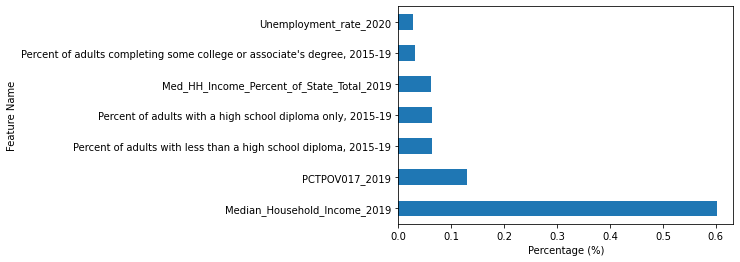

In [57]:
# plot the 7 most important features 

fig, ax = plt.subplots()


feat_importances = pd.Series(gbrt.feature_importances_, index = X_train.columns)
ax = feat_importances.nlargest(7).plot(kind='barh')

ax.set_xlabel("Percentage (%)")
ax.set_ylabel("Feature Name")

# Add the legend and show the Figure
#ax.legend()
plt.savefig('features_gbrt.png', bbox_inches="tight")
plt.show();

## GradientBoostingRegressor GridSearchCV

In [63]:
# define steps
steps = [('gbrt', GradientBoostingRegressor())]

# instantiate pipeline object
pipe = Pipeline(steps)

# define gridsearch parameters dict
# most important parameters: n_estimators, learning rate

param_grid = {'gbrt__n_estimators': [100, 200, 300, 400, 500],
              'gbrt__learning_rate': [0.001, 0.01, 0.1, 1]}

# split data into test train split

# test, train split data
features = df_.drop('e(0)', axis=1)
target = df_['e(0)']
X_train, X_test, y_train, y_test = train_test_split(
    features, target, train_size=0.70)

# instantiate GridSearchCV object using pipeline, parameters dict
grid_search = GridSearchCV(pipe, param_grid, cv=5, return_train_score=True)

# fit grid_search to trainings sets
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('gbrt', GradientBoostingRegressor())]),
             param_grid={'gbrt__learning_rate': [0.001, 0.01, 0.1, 1],
                         'gbrt__n_estimators': [100, 200, 300, 400, 500]},
             return_train_score=True)

In [64]:
# evaluate model performance metrics

y_pred = grid_search.predict(X_test)

model_name = "GradientBoostingRegressor - GridSearch"
RMSE_score = mean_squared_error(y_test, y_pred, squared=False)
params_ = grid_search.best_params_
train_score = grid_search.score(X_train,y_train)
test_score = grid_search.score(X_test, y_test)

print("Train set score: {:2f}".format(train_score))
print("Test set score: {:.2f}".format(test_score))
print("Best parameters: {}".format(params_))
print("RMSE score: {}".format(RMSE_score))
print("Best cross_validation score: {:.2f}".format(grid_search.best_score_))

#Append model metrics to df_summary

# append RandomForestRegressor() information to df_summary
df_summary = df_summary.append({'name': model_name , 'parameters':params_, 'train set score': test_score,
                                'test set score': train_score,
                                'RMSE': RMSE_score}, ignore_index=True)


Train set score: 0.291235
Test set score: 0.26
Best parameters: {'gbrt__learning_rate': 0.1, 'gbrt__n_estimators': 500}
RMSE score: 3.434725486153979
Best cross_validation score: 0.26


# Model Results Summary:


In [53]:
# Regression Model Results Dataframe
df_summary

,name,parameters,train set score,test set score,RMSE
0,Random Forest,<bound method BaseEstimator.get_params of Rand...,0.248842,0.323510,3.449325
1,Random Forest,"{'forest__max_features': 6, 'forest__n_estimat...",0.247870,0.322864,3.434082
2,GradientBoostingRegressor,<bound method BaseEstimator.get_params of Grad...,0.246904,0.256434,3.476700


In [54]:
df_summary.loc[df_summary.RMSE == df_summary.RMSE.min()]

,name,parameters,train set score,test set score,RMSE
1,Random Forest,"{'forest__max_features': 6, 'forest__n_estimat...",0.24787,0.322864,3.434082
